# DATA ANALYSIS ON GOOGLE APP'S RATINGS

DatasetLink - https://www.kaggle.com/lava18/google-play-store-apps

##  1. Importing important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

import warnings
warnings.filterwarnings('ignore')

### 1.1 Loading the dataset

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Google Play Store Analysis.ipynb',
 'googleplaystore.csv']

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
df.tail()

App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10836       Everyone          Education     July 25, 2017                1.48   
10837       Everyone          Education      July 6, 2018                   1   
10838       Everyone            Medical  January 20, 2017                   1   
10839     Mature 17+  Books & Reference  January 19, 2015  Varies with device   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device

### 3. Checking the shape of dataset

In [5]:
df.shape

(10841, 13)

- there are total 10841 samples and 13 features

### 1.2 Checking the datatype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- Apart form rating all columns have categorical type

### 1.3 Descriptive Statistic for Dataframe

In [7]:
#Summary statistics. It will show you the summary statistic for all the numerical values
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

<AxesSubplot:>

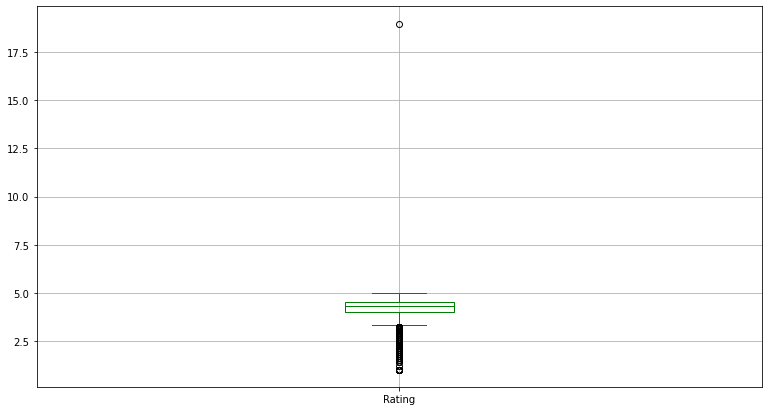

In [8]:
df.boxplot(figsize = (13,7),color = 'green')

__Insights__: Here we above we can see that outlier in the given dataset.

## 2. Data cleaning

#### 2.1 Checking the missing values

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- there are some missing values in rating columns.

In [10]:
# Percent of missing values
missing_values_percent = df.isnull().sum()*100/len((df))
missing_values_percent

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

- Rating have 13% missing values and Current Ver,Android Ver, Content Rating & Type also  have missing values.


#### 2.2 Checking the rating >5

In [11]:
df[df['Rating']>5]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [12]:
df.drop([10472], inplace = True)

##### 2.2.1 lets check the df.rating['10472'] is deleted or not

In [13]:
df[10470:10475]

App         Category  Rating Reviews  Size  \
10470               Jazz Wi-Fi    COMMUNICATION     3.4      49  4.0M   
10471         Xposed Wi-Fi-Pwd  PERSONALIZATION     3.5    1042  404k   
10473  osmino Wi-Fi: free WiFi            TOOLS     4.2  134203  4.1M   
10474             Sat-Fi Voice    COMMUNICATION     3.4      37   14M   
10475         Wi-Fi Visualizer            TOOLS     3.9     132  2.6M   

          Installs  Type Price Content Rating           Genres  \
10470      10,000+  Free     0       Everyone    Communication   
10471     100,000+  Free     0       Everyone  Personalization   
10473  10,000,000+  Free     0       Everyone            Tools   
10474       1,000+  Free     0       Everyone    Communication   
10475      50,000+  Free     0       Everyone            Tools   

            Last Updated Current Ver   Android Ver  
10470  February 10, 2017         0.1    2.3 and up  
10471     August 5, 2014       3.0.0  4.0.3 and up  
10473     August 7, 2018     6.06.14    4.4 and up  
10474  November 21, 2014     2.2.1.5    2.2 and up  
10475       May 17, 2017       0.0.9    2.3 and up

- Here we can see that '10472' is deleted

<AxesSubplot:>

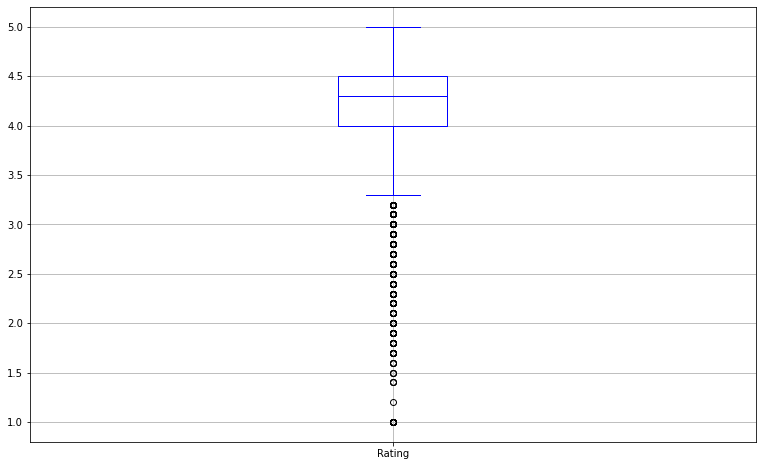

In [14]:
## Again draw boxplot and see the difference
df.boxplot(figsize=(13,8),color='blue')

__insights__: After removing outlier( 19.0 value), we can see difference in the boxplot.

#### 2.3 Handling the missing values

In [15]:
df['Rating'].fillna(df['Rating'].mean(),inplace = True) # filling mean value to rating feature

In [16]:

df['Type'].fillna(str(df['Rating'].mode()), inplace  = True)   # filling mode value to type columns

df['Content Rating'].fillna(str(df['Content Rating'].mode()),  inplace = True)   ## filling mode value to Content Rating feature

df['Current Ver'].fillna(str(df['Current Ver'].mode()), inplace = True)

df['Android Ver'].fillna(str(df['Android Ver'].mode()), inplace = True)  # filling mode value to content rating featurw


In [17]:
### checking again the missing values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### 2.4 Converting Rating columns into numeric type

In [18]:

df['Rating'] = df['Rating'].apply(lambda x:str(x).replace('$', '') if '$' in str(x) else str(x))

df['Rating'] = df['Rating'].apply(lambda x: float(x))

#### 2.5 Converting Reviews columns into numeric type

In [19]:


#df['Reviews'] = df['Reviews'].apply(lambda x: int(str(x)))

df['Reviews'] = pd.to_numeric(df['Reviews'])

#### 2.6 converting price Installs into numeric type

In [20]:

df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = pd.to_numeric(df['Installs'])

#### 2.7 converting price column into numeric type

In [21]:

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


- Here we sucessfully converted '__Rating__' , '__Reviews__', '__Installs__' & __'Price'__ into numeric type

In [23]:
df.describe() #statistical value after cleaning of data.

Rating       Reviews      Installs         Price
count  10840.000000  1.084000e+04  1.084000e+04  10840.000000
mean       4.191757  4.441529e+05  1.546434e+07      1.027368
std        0.478907  2.927761e+06  8.502936e+07     15.949703
min        1.000000  0.000000e+00  0.000000e+00      0.000000
25%        4.100000  3.800000e+01  1.000000e+03      0.000000
50%        4.200000  2.094000e+03  1.000000e+05      0.000000
75%        4.500000  5.477550e+04  5.000000e+06      0.000000
max        5.000000  7.815831e+07  1.000000e+09    400.000000

####  2.8 Replacing '0    4.191757\ndtype: float64' into 'free' in type colum

In [24]:
# df['Type'].unique()  ## 
df['Type'] = df['Type'].apply(lambda x: str(x).replace('0    4.191757\ndtype: float64','Free'))  #

## 3. Data Visualization

In [25]:
print(df['Rating'].mean())
print(df['Reviews'].mean())
print(df['Installs'].mean())

4.191757420456971
444152.89603321033
15464338.882564576


#### 3.1 Distribution of Rating

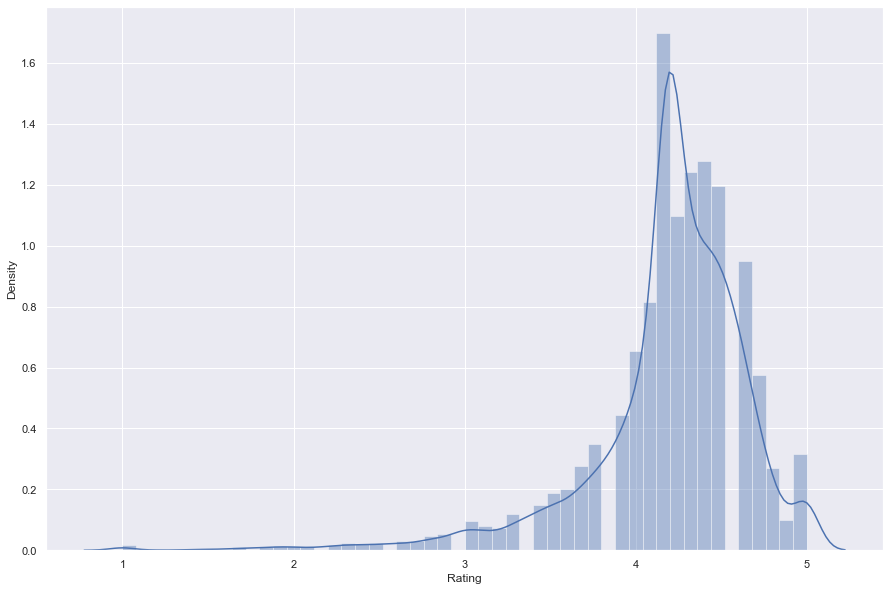

In [26]:
plt.figure(figsize = (15,10))
sns.set()
sns.distplot(df['Rating'])
plt.show()

__Insights:__ Most of the rating between  3.5 to 5.

#### 3.2 Category 

In [27]:
# lets see how many categories are there and total number of apps grouped by category
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

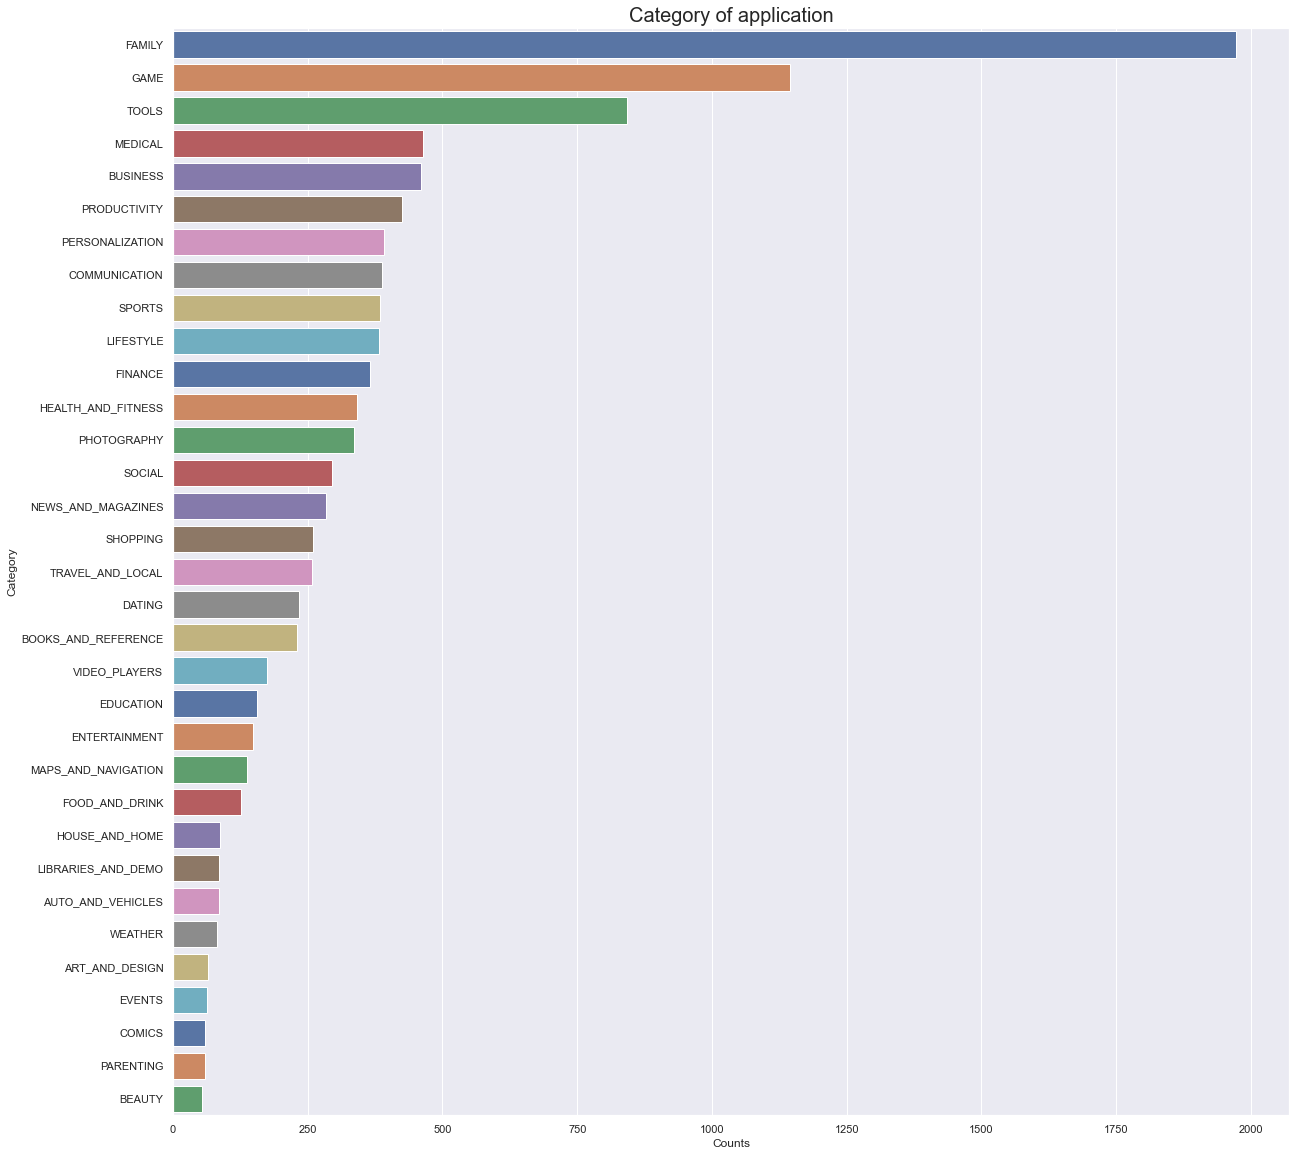

In [28]:
plt.figure(figsize = (20,20))
value = df['Category'].value_counts()
sns.barplot(x = value, y = value.index, palette = 'deep')
plt.title('Category of application',fontsize = 20)
plt.xlabel('Counts')
plt.ylabel('Category')
plt.show()

__Insights:__ 
- Most of the application belongs to Family, games and tools category.
- Beauty and comics are the least category.

####  3.3 Top 40 "APP"

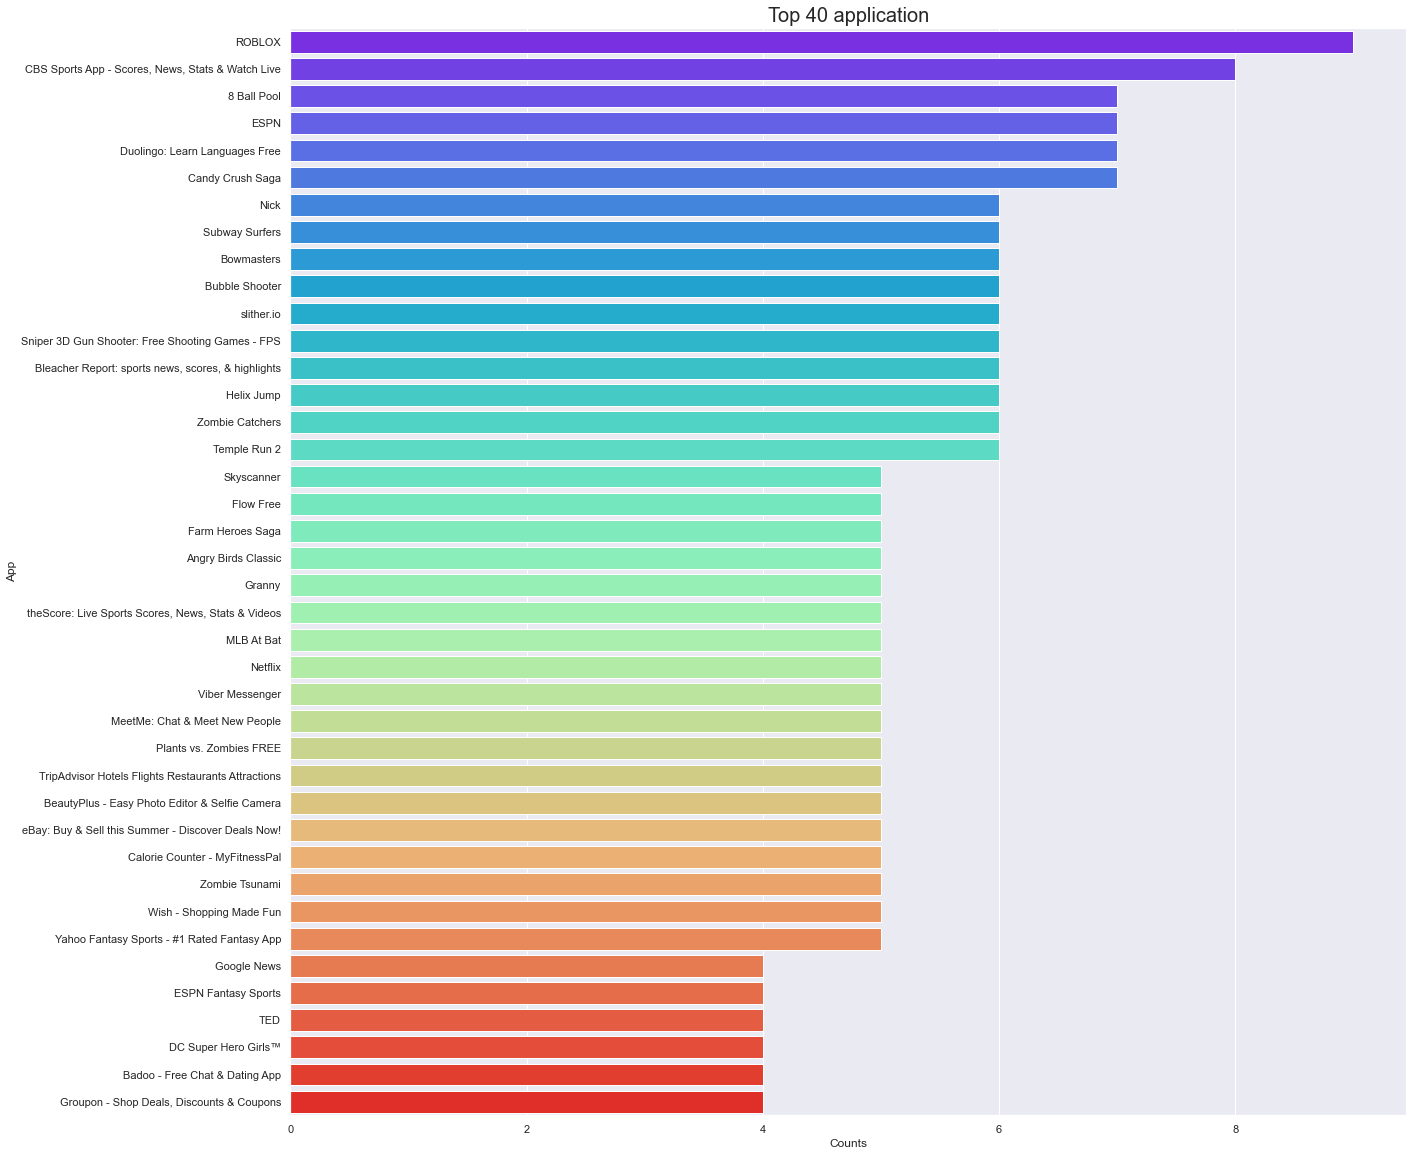

In [29]:
plt.figure(figsize = (20,20))
value = df['App'].value_counts()[:40]
sns.barplot(x = value, y = value.index, palette = 'rainbow')
plt.title('Top 40 application',fontsize = 20)
plt.xlabel('Counts')
plt.ylabel('App')
plt.show()

__Insights:__
- Here i selected top 40 applications.
- Here based on dataset 'ROBLOX', 'CBS Sports App - Scores, News, Stats & Watch Live', 'ESPN' are most the famous application.

#### 3.4 Size of application

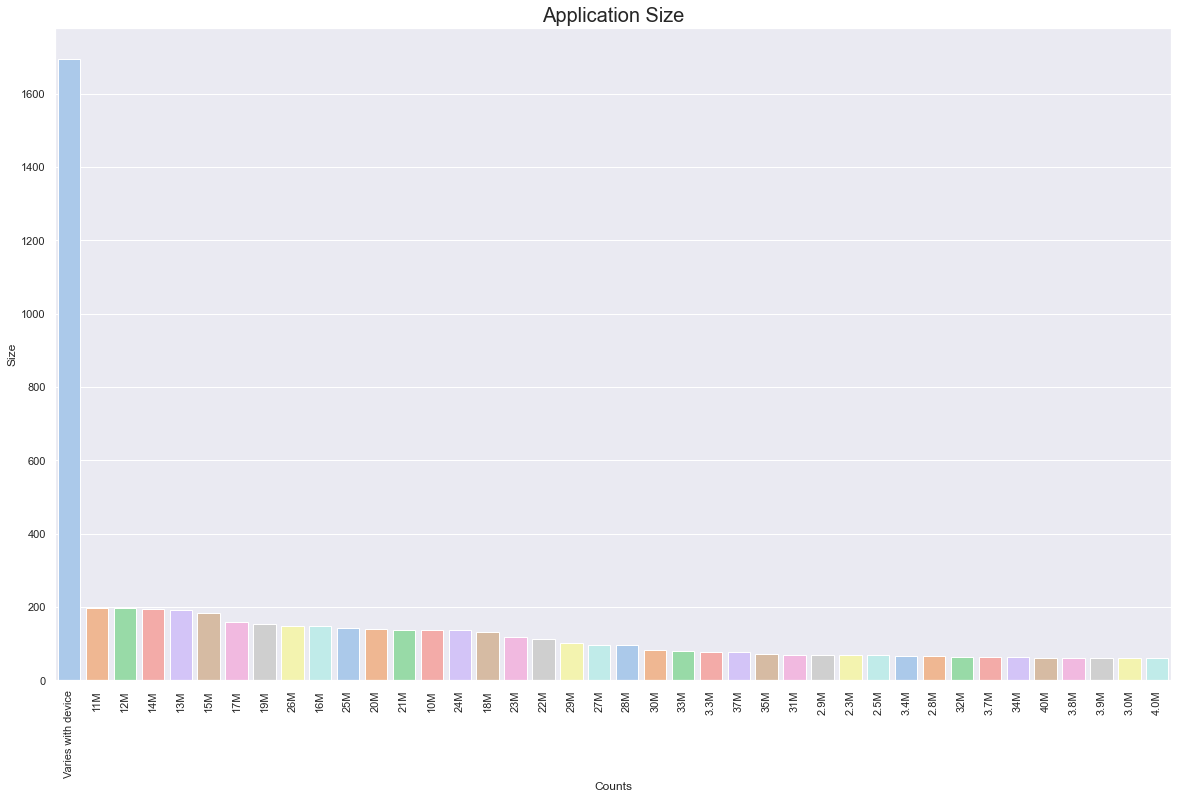

In [30]:
# checking the size of top 20 applications
plt.figure(figsize = (20,12))
value = df['Size'].value_counts()[:40] 
sns.barplot(y = value, x = value.index, palette = 'pastel')
plt.xticks(rotation  =90)
plt.title('Application Size', fontsize = 20)
plt.xlabel('Counts')
plt.ylabel('Size')
plt.show()

__Insights:__
.
- Here based on dataset most of application size Varies with device.

#### 3.5 Types (free or paid)

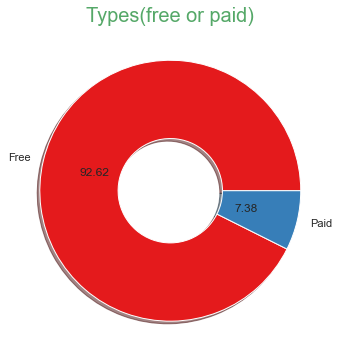

In [31]:
value = df["Type"].value_counts()

fig = plt.gcf()
fig.set_size_inches((10,6))
cmap = plt.get_cmap('Set1')
color = cmap(np.arange(len(value)))
#color=  ['r', 'g']
plt.pie(value, labels = value.index, autopct = "%0.02f",
        colors = color,labeldistance = 1.1,wedgeprops=dict(width= 0.6), shadow = True)

plt.title('Types(free or paid)', fontsize = 20, color = 'g')
plt.show()

__Insights:__ 
- here we can see that approx 7% application are paid.

#### 3.6 Content Rating

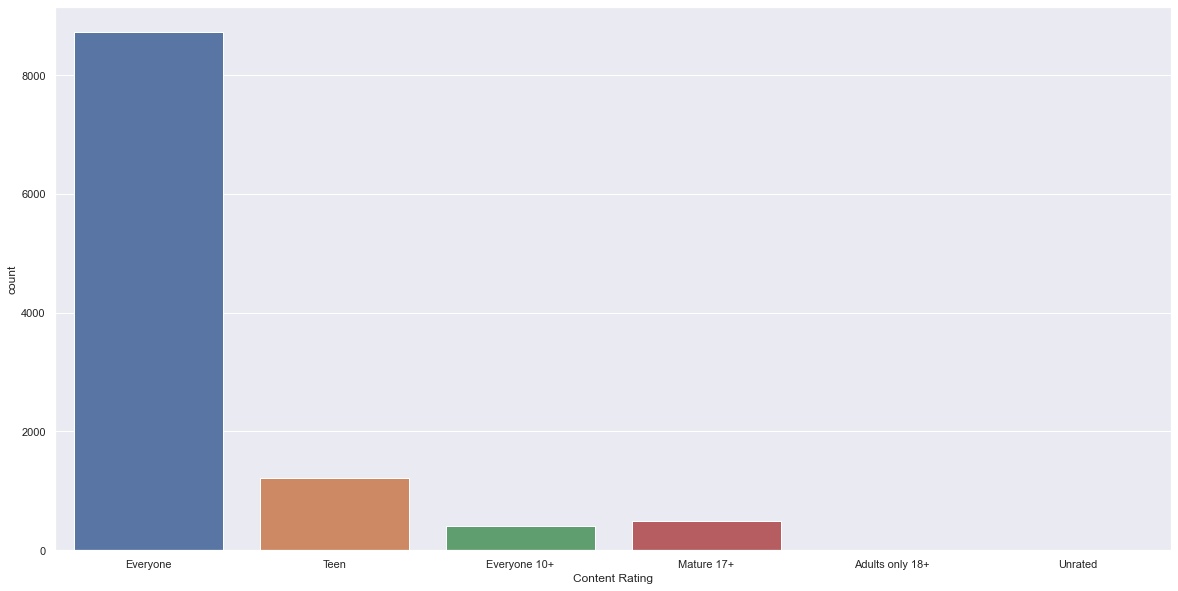

In [32]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.countplot(x = 'Content Rating', data = df)
plt.show()

__Insights__:
- 'Adults18' and 'Unrated' have very less '__content Rating__'.

#### 3.7 Genres visuliazation

In [33]:
value = df['Genres'].value_counts()

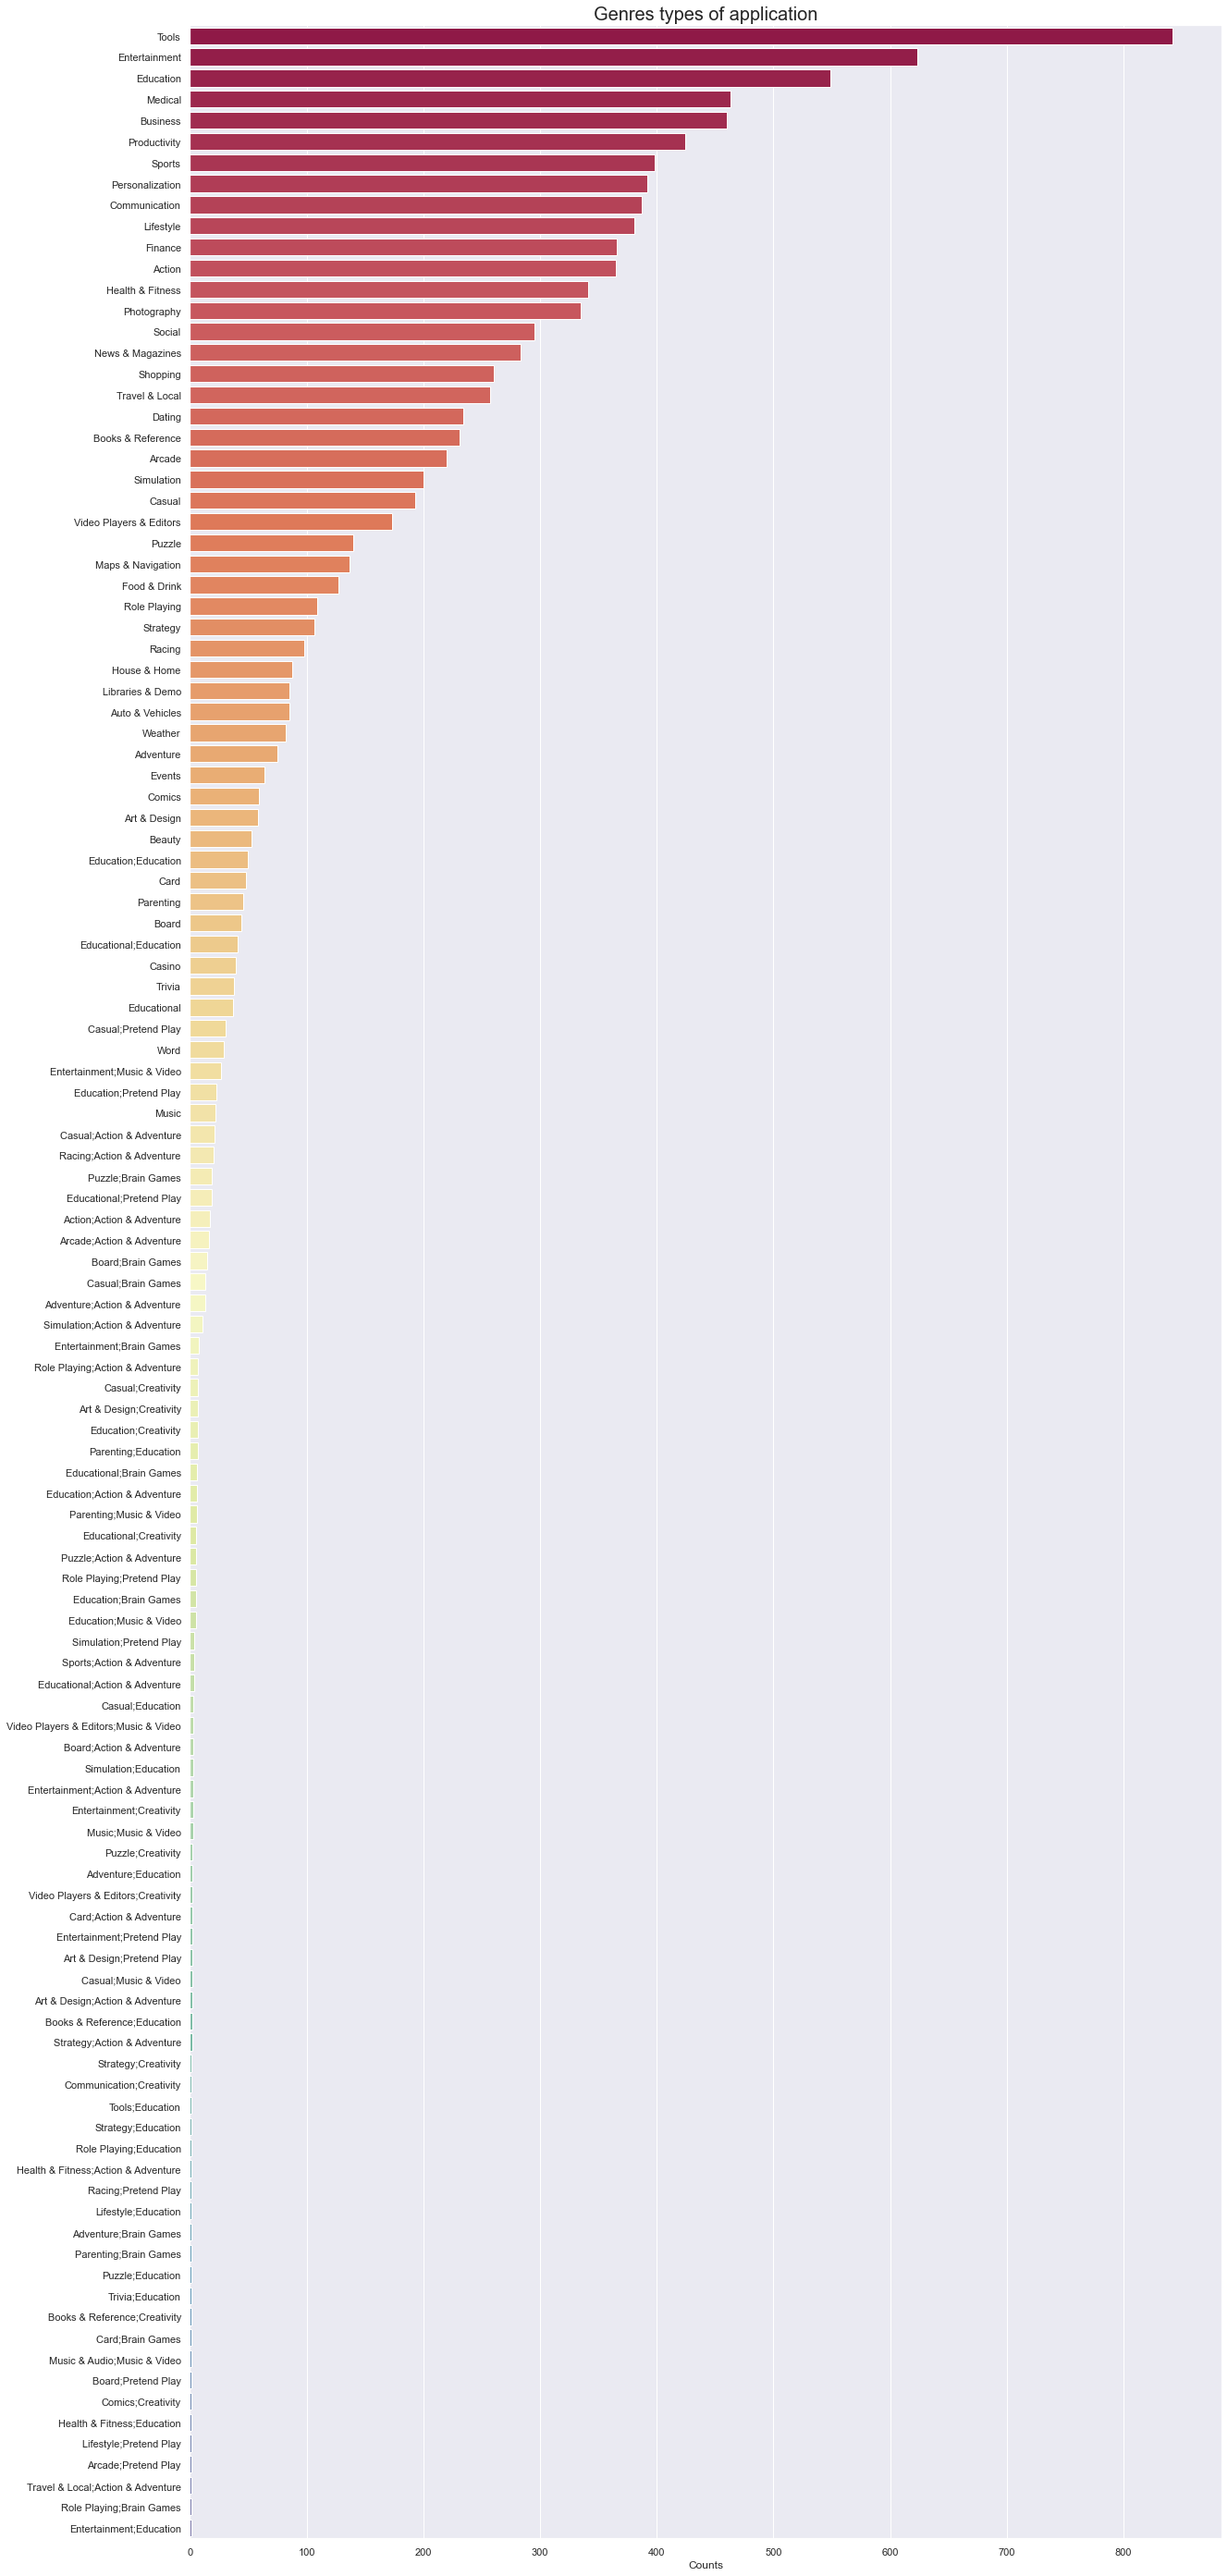

In [34]:
plt.figure(figsize = (20,50))
sns.barplot(x = value, y = value.index, palette = 'Spectral')
plt.title('Genres types of application', fontsize = 20)
plt.xlabel('Counts')
plt.show()

__Insights:__
- 'Tools', 'Entertainment', 'Education', 'Medical', 'Business' are the most  __Genres__ types of application.

#### 3.8 Android version of application

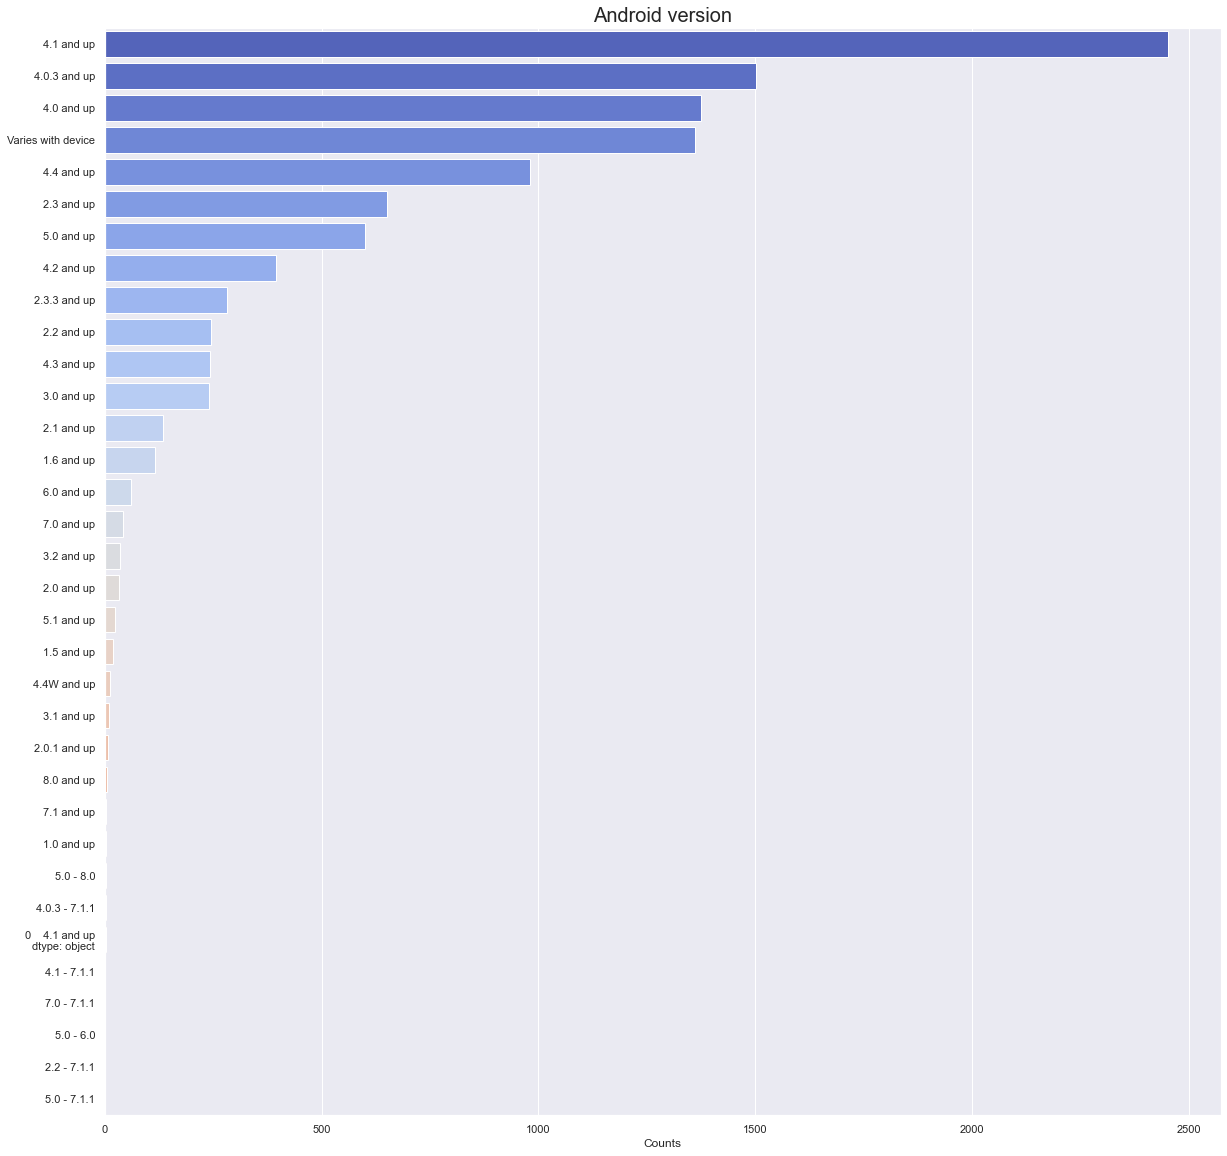

In [35]:
# checking the Android version of the application
value = df['Android Ver'].value_counts()
plt.figure(figsize = (20,20))
sns.barplot(x = value, y = value.index, palette = 'coolwarm')
plt.title('Android version', fontsize = 20)
plt.xlabel('Counts')
plt.show()


__Insights__:
- Most of the Android version is '4.1 and up', '4.0.3 and up', '4.0 and up' and 'Varies with device'. 
- And ['5.0 - 8.0',  '4.0.3 - 7.1.1', '2.2 - 7.1.1', '4.1 - 7.1.1', '5.0 - 7.1.1', '7.0 - 7.1.1', '5.0 - 6.0'] are very less types of android version.

#### 3.9 Visualization based of 'Price' , 'Reviews' & 'Rating' based on  the category

In [36]:
grp = df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Reviews'].agg(np.mean)
z = grp['Price'].agg(np.sum)

In [37]:
x  ##  Average rating based on category

Category
ART_AND_DESIGN         4.350389
AUTO_AND_VEHICLES      4.190601
BEAUTY                 4.260553
BOOKS_AND_REFERENCE    4.310663
BUSINESS               4.145448
COMICS                 4.156392
COMMUNICATION          4.163601
DATING                 4.007601
EDUCATION              4.387768
ENTERTAINMENT          4.126174
EVENTS                 4.363178
FAMILY                 4.192214
FINANCE                4.138922
FOOD_AND_DRINK         4.170485
GAME                   4.282441
HEALTH_AND_FITNESS     4.266092
HOUSE_AND_HOME         4.196603
LIBRARIES_AND_DEMO     4.181590
LIFESTYLE              4.112145
MAPS_AND_NAVIGATION    4.064911
MEDICAL                4.189781
NEWS_AND_MAGAZINES     4.142713
PARENTING              4.281960
PERSONALIZATION        4.307288
PHOTOGRAPHY            4.192094
PRODUCTIVITY           4.208015
SHOPPING               4.253918
SOCIAL                 4.247808
SPORTS                 4.218136
TOOLS                  4.066075
TRAVEL_AND_LOCAL       4.119520

In [38]:
y  ## Average review based on category

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

In [39]:
z  # Price based on Category

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

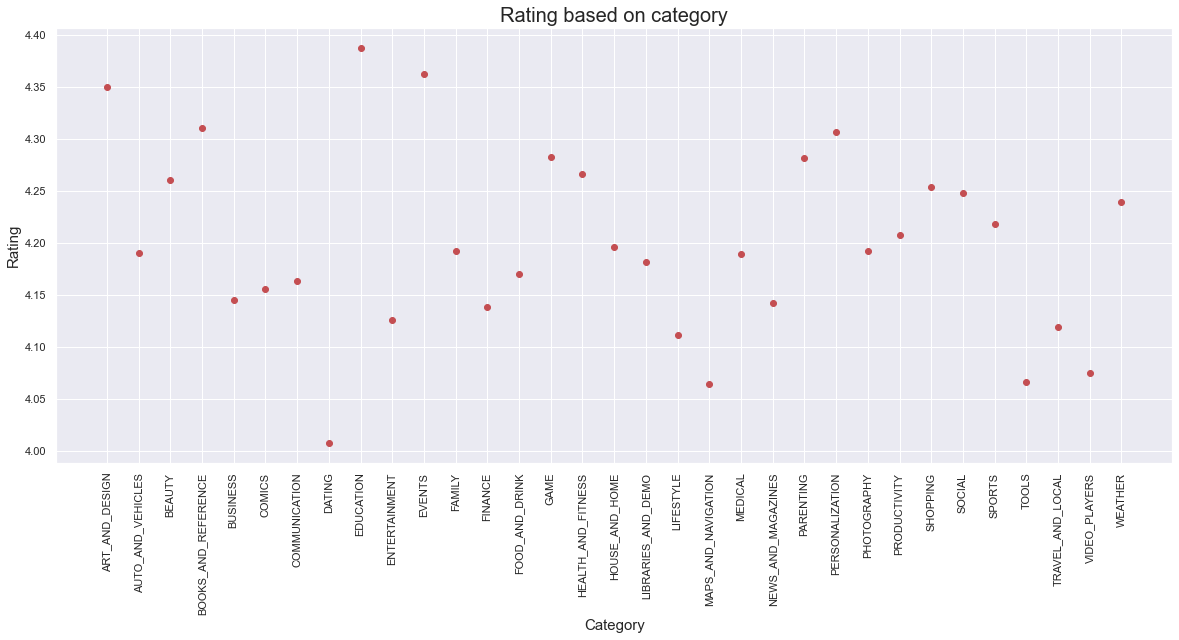

In [40]:
plt.figure(figsize = (20,8))
plt.plot(x, 'ro')
plt.xticks(rotation = 90)
plt.title('Rating based on category', fontsize = 20)
plt.xlabel('Category', fontsize =  15)
plt.ylabel('Rating', fontsize = 15)
plt.show()

- After analysing the above graph we can see that category of __'ART_AND_DESIGN '__, __'EDUCATION'__ & __'EVENTS'__ have higest rating.

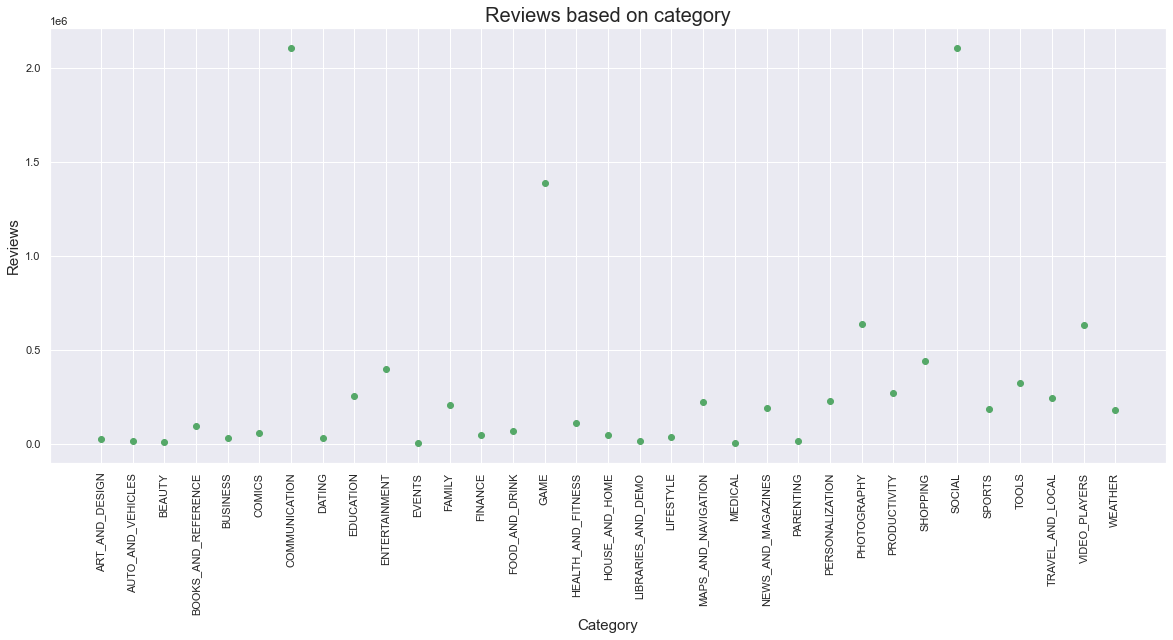

In [41]:
plt.figure(figsize = (20,8))
plt.plot(y, 'go')
plt.xticks(rotation = 90)
plt.title('Reviews based on category', fontsize = 20)
plt.xlabel('Category', fontsize =  15)
plt.ylabel('Reviews', fontsize = 15)
plt.show()

- After analysing the above graph we can see that category of __'COMMUNICATION'__, __'GAME'__ & __'SOCIAL'__ have higest reviews.

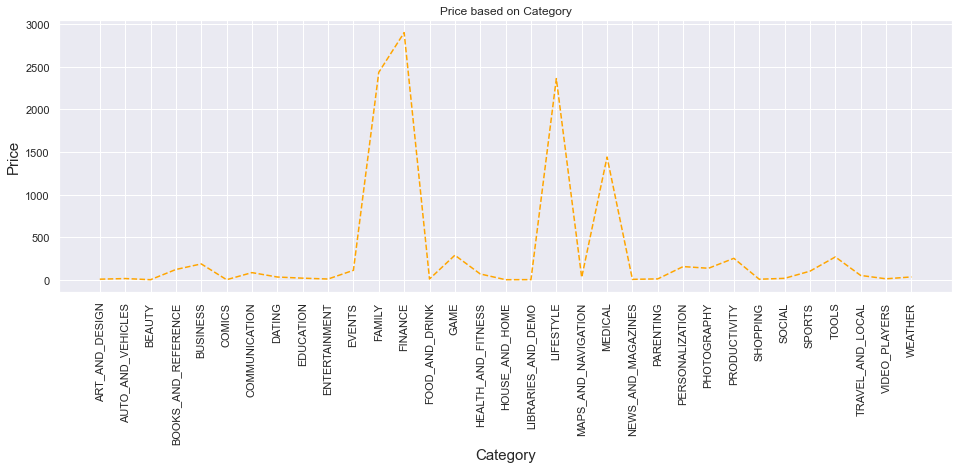

In [42]:
plt.figure(figsize=(16,5))
plt.plot(z,'r--',color='orange')
plt.xticks(rotation=90)
plt.title('Price based on Category')
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Price', fontsize=  15)
plt.show()

__Insights__:
- After analysing the above graph we can see that category of __'finance'__, __'lifestyle'__ & __'medical'__  are most buying apps.

#### 3.10 Highest Installation based on  Category

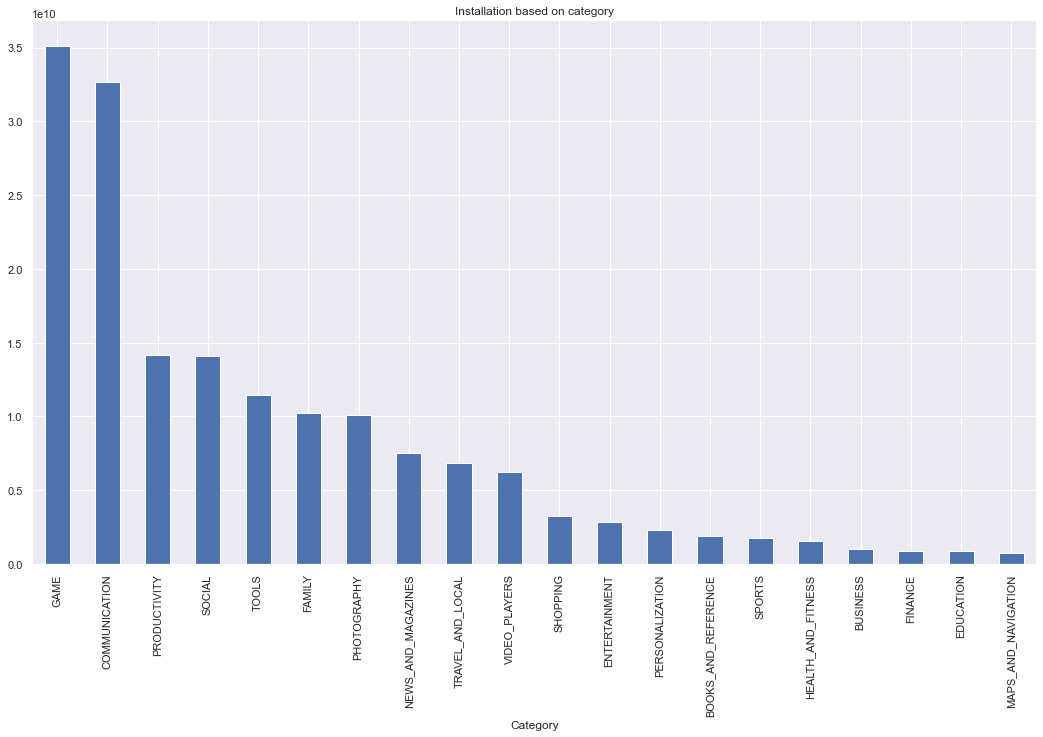

In [43]:
s = grp['Installs'].agg(np.sum)
ax = s.nlargest(n = 20, keep = 'first').plot(kind = 'bar', figsize = (18,10), title=  'Installation based on category')

- Here from above we can see that '__Games__' & '__Communication__' category  of  application installed mostly.

#### 3.11 Category vs types

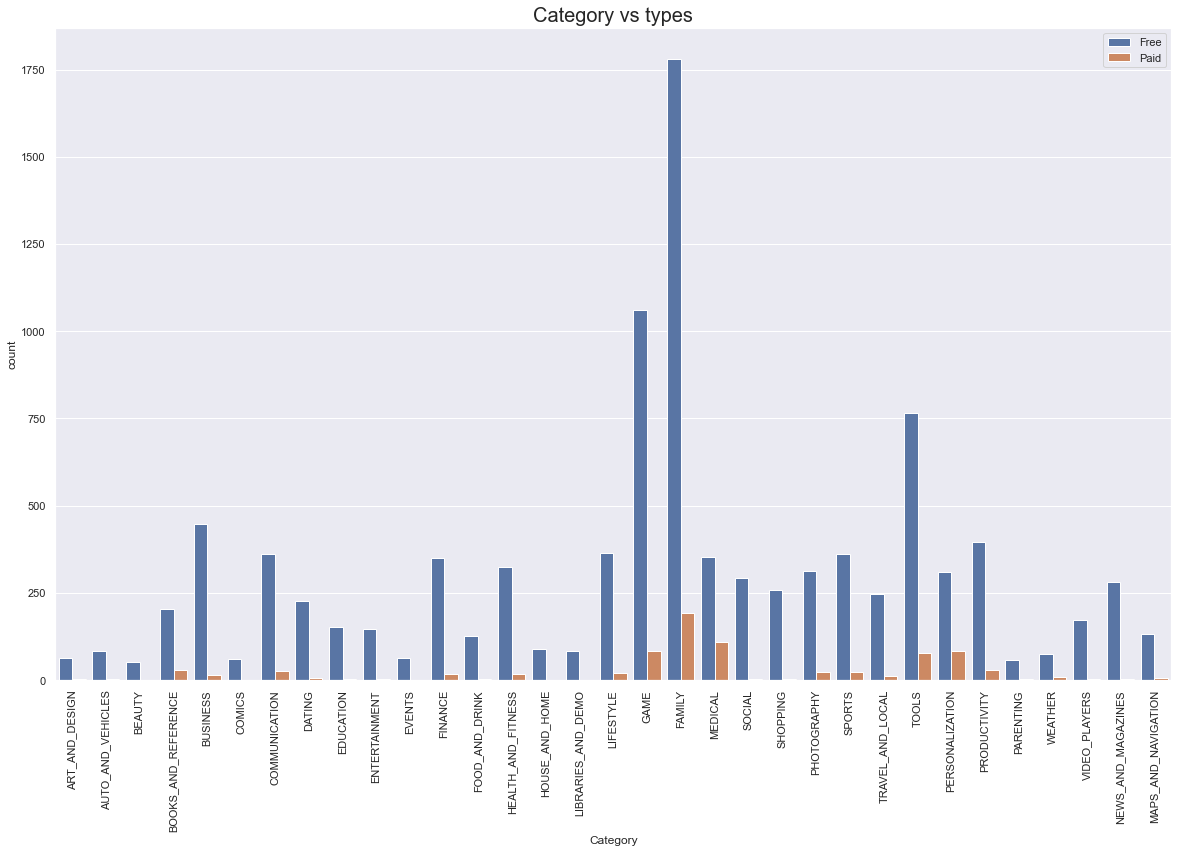

In [44]:
plt.figure(figsize = (20,12))
sns.countplot(x = "Category", data  = df, hue = 'Type')
plt.title('Category vs types', fontsize = 20)
plt.legend(loc = "upper right")
plt.xticks(rotation = 90)
plt.show()

#### 3.12 app with largest no of installs

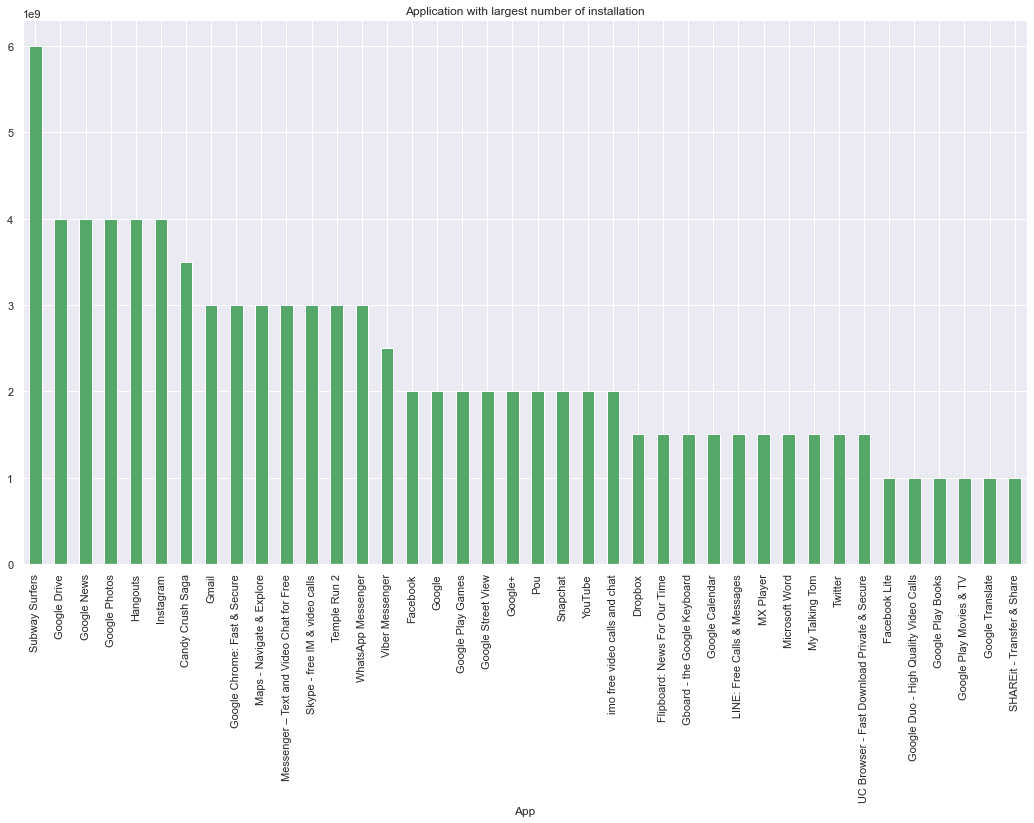

In [45]:
# 40 highest number of installation of application
grp = df.groupby('App')
r = grp['Installs'].agg(np.sum)


ax = r.nlargest(n = 40, keep = 'first').plot(kind = 'bar', figsize = (18,10), title=  'Application with largest number of installation',
                                       color = 'g')

"""
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))
"""
plt.show()

- Here above we can see that __Subwaysurfer__, __Google drive__, __Google news__ are most installed application.

#### 3.13 Google Play Apps Android Version Ratio   

- Plotly - Donut Chart ( Interactive )

In [46]:
label = df['Android Ver'].unique()
values = []
for each in label:
    values.append(len(df[df['Android Ver'] == each]))
    
# Use Hole to create donut-like pie chart

fig = go.Figure(data = [go.Pie(labels = label, values = values, hole = .3)])
fig.show()

#### 3.14 Corrration b/w features

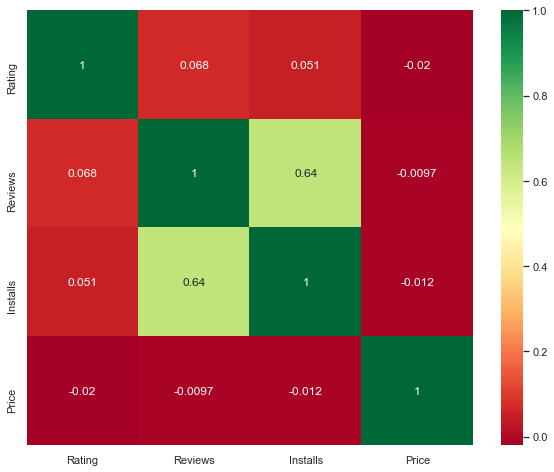

In [47]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap  = 'RdYlGn')
plt.show()

### Conclusion :

- Most of the rating between  3.5 to 5.

- Most of the application belongs to Family, games and tools category & Beauty and comics are the least category.

- Here i selected top 40 applications & based on dataset 'ROBLOX', 'CBS Sports App - Scores, News, Stats & Watch Live', 'ESPN' are most the famous application.

- Here based on dataset most of application size Varies with device.

- here we can see that approx 7% application are paid.

- 'Adults18' and 'Unrated' have very less '__content Rating__'.

- 'Tools', 'Entertainment', 'Education', 'Medical', 'Business' are the most  __Genres__ types of application.


- After analysing the  graph we can see that category of __'ART_AND_DESIGN '__, __'EDUCATION'__ & __'EVENTS'__ have higest rating.

- After analysing the  graph we can see that category of __'COMMUNICATION'__, __'GAME'__ & __'SOCIAL'__ have higest reviews.

- After analysing the  graph we can see that category of __'finance'__, __'lifestyle'__ & __'medical'__  are most buying apps.

- Here from above we can see that '__Games__' & '__Communication__' category  of  application installed mostly.

- Here from above we can see that __Subwaysurfer__, __Google drive__, __Google news__ are most installed application.